In [1]:
%load_ext autoreload
%autoreload 2
import eval_fcm as FCM_class
import utils.FLT_class as FLT_class
import matplotlib.pyplot as plt

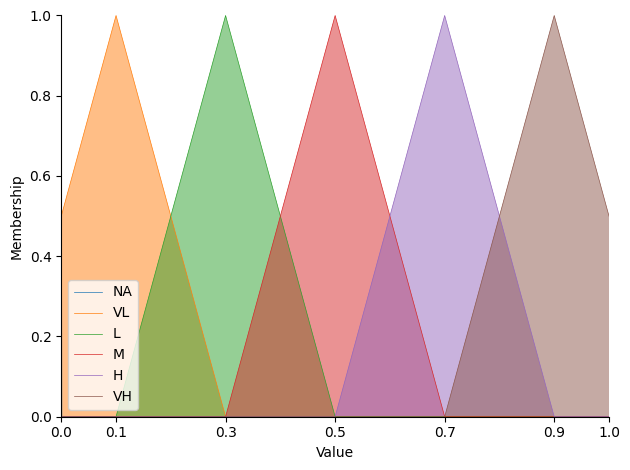

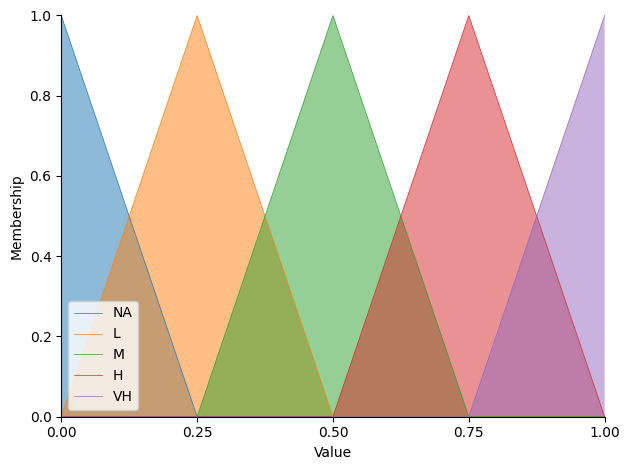

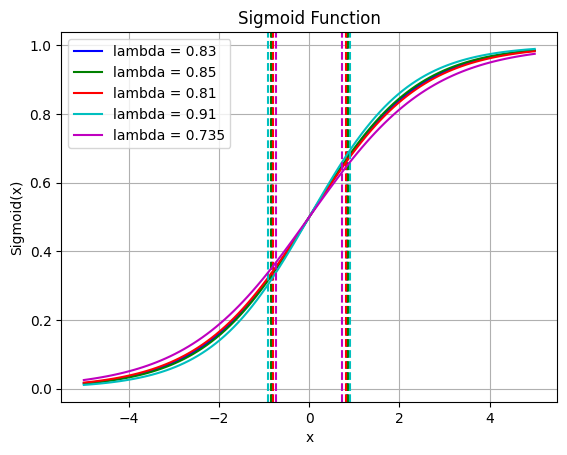

In [2]:
flt = FLT_class.define_al_fuzzy()
flt.plot_triangle()

flt2 = FLT_class.define_wm_fuzzy()
flt2.plot_triangle()
n_fcm = 5
iterations = 100
threshold = 0.001
fcm_algorithm = ["kosko", "stylios", "papageorgiou"]
lambdas_values = [{
    1: 0.83,
    2: 0.85,
    3: 0.81,
    4: 0.91,
    5: 0.735
}, {
    1: 0.2,
    2: 0.2,
    3: 0.2,
    4: 0.2,
    5: 0.2
}, {
    1: 2,
    2: 2,
    3: 2,
    4: 2,
    5: 2
}
]
colors = FCM_class.plot_sigmoid(lambdas_values[0])
companies = ["low", "high"]

In [3]:
res_algo = {}
for algo in fcm_algorithm:
    res = []
    for i in range(len(lambdas_values)):
        lambdas = lambdas_values[i]
        models = []
        for c in companies:
            print(f"Algorithm: {algo}, Iterations: {iterations}, Company Type: {c}")
            fcm_obj = FCM_class.FCM(n_fcm, iterations, lambdas, c, flt)
            fcm_obj.run_fcm(algo, threshold)
            fcm_obj.print_results(flt)
            linguistic_al = flt.get_linguisitic_term(fcm_obj.main_final_al)
            print(f"Final activation level: {fcm_obj.main_final_al} ({linguistic_al})")
            models.append(fcm_obj)
            print("\n")
        res.append(models)
    res_algo[algo] = res

Algorithm: kosko, Iterations: 100, Company Type: low
Threshold reached at iteration 5
Node: 0, Value: 0.94855, prev: 0.94765
Threshold reached at iteration 6
Node: 0, Value: 0.93049, prev: 0.93022
Threshold reached at iteration 5
Node: 0, Value: 0.96381, prev: 0.96302
Threshold reached at iteration 5
Node: 0, Value: 0.9752, prev: 0.97474
Threshold reached at iteration 6
Node: 0, Value: 0.95798, prev: 0.95772
6
Main final activation level: 0.9546699999999999
Activation levels of nodes in the FCMs
FCM 0
	 Initial: [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
		  ['NA', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
	 Final: [0.94765, 0.51836, 0.68351, 0.70714, 0.70561, 0.58633, 0.76706, 0.71369]
		  ['VH', 'M', 'H', 'H', 'H', 'M', 'H', 'H']
FCM 1
	 Initial: [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
		  ['NA', 'L', 'L', 'L', 'L', 'L', 'L']
	 Final: [0.93022, 0.58908, 0.70911, 0.71814, 0.65903, 0.63574, 0.75827]
		  ['VH', 'M', 'H', 'H', 'H', 'H', 'H']
FCM 2
	 Initial: [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
		

Threshold reached at iteration 81
Node: 0, Value: 0.26209, prev: 0.2611
Threshold reached at iteration 68
Node: 0, Value: 0.27389, prev: 0.2729
81
Main final activation level: 0.25799399999999995
Activation levels of nodes in the FCMs
FCM 0
	 Initial: [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
		  ['NA', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
	 Final: [0.26822, 0.49183, 0.42706, 0.41306, 0.41542, 0.46146, 0.3894, 0.40871]
		  ['L', 'M', 'M', 'M', 'M', 'M', 'L', 'M']
FCM 1
	 Initial: [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
		  ['NA', 'L', 'L', 'L', 'L', 'L', 'L']
	 Final: [0.2562, 0.45899, 0.40424, 0.39914, 0.41666, 0.43471, 0.37942]
		  ['L', 'M', 'M', 'L', 'M', 'M', 'L']
FCM 2
	 Initial: [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
		  ['NA', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
	 Final: [0.23155, 0.44855, 0.40049, 0.38228, 0.41843, 0.45942, 0.43819, 0.42614, 0.40165]
		  ['L', 'M', 'M', 'L', 'M', 'M', 'M', 'M', 'M']
FCM 3
	 Initial: [0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
		  ['NA', 'L', 'L'

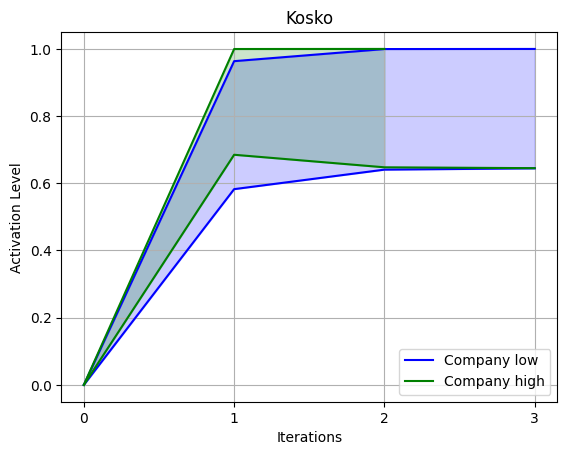

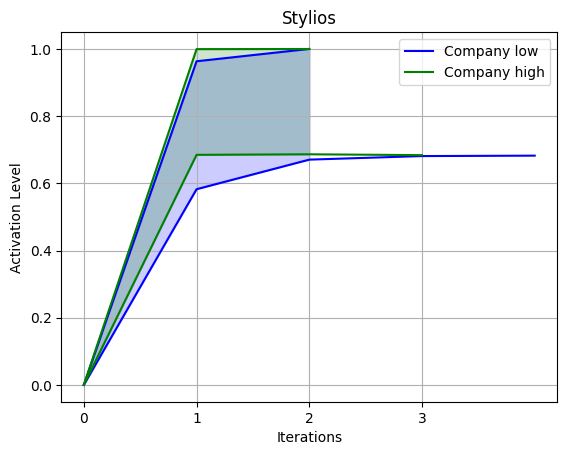

In [4]:
for algo in ["kosko", "stylios"]:
    fcms = res_algo[algo]
    all_x = {}
    all_y = {}
    for i in range(len(lambdas_values)):
        if i == 0:
            continue
        fcm_objs = fcms[i]
        for j in range(len(companies)):
            models = fcm_objs[j]
            if companies[j] not in all_y:
                all_y[companies[j]] = []
            all_y[companies[j]].append(models.final_al_mean)
    name_algorithm = algo[0].upper() + algo[1:]
    plt.figure(name_algorithm)
    plt.title(name_algorithm)
    for i in range(len(companies)):
        comp_type = companies[i]
        all_x = min(len(all_y[comp_type][0]), len(all_y[comp_type][1]))
        plt.plot(list(range(len(all_y[comp_type][0]))), all_y[comp_type][0], color=colors[i], label=f"Company {comp_type}")
        plt.plot(list(range(len(all_y[comp_type][1]))), all_y[comp_type][1], color=colors[i])
        plt.fill_between(list(range(all_x)), all_y[comp_type][0][:all_x], all_y[comp_type][1][:all_x], color=colors[i], alpha=0.2)
    plt.xlabel("Iterations")
    plt.ylabel("Activation Level")
    plt.legend()
    plt.grid()
    plt.xticks(range(all_x+1))
    plt.show()

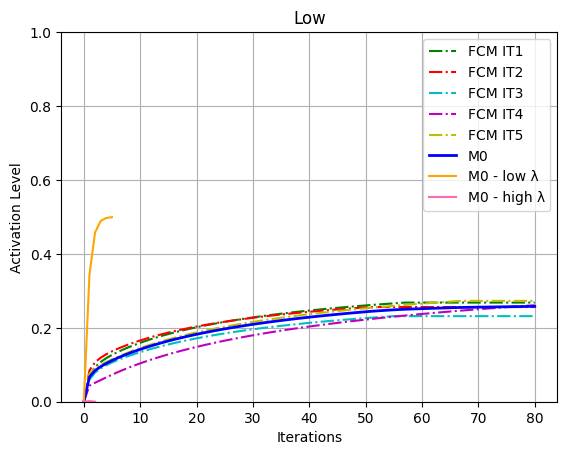

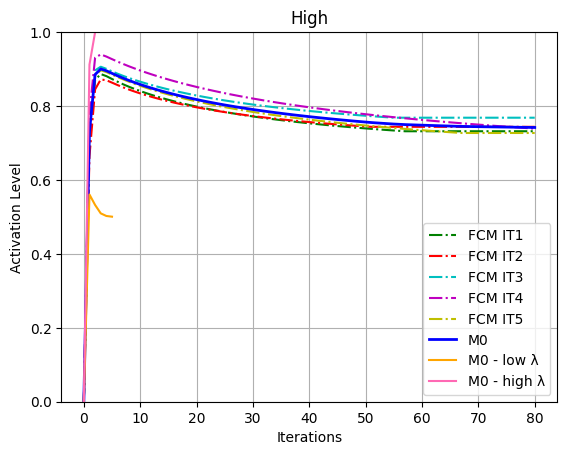

In [5]:
fcms = res_algo['papageorgiou']
all_x = {}
all_y = {}
fcm_objs = fcms[0]
for j in range(len(companies)):
    models = fcm_objs[j]
    if companies[j] not in all_y:
        all_y[companies[j]] = []
    all_y[companies[j]].append(models.final_al_mean)

other_colors = ['gray', 'orange', 'hotpink']
lambdas_lab = ['low', 'high']

for i in range(len(companies)):
    company = companies[i][0].upper() + companies[i][1:]
    plt.figure(company)
    plt.title(company)
    comp_type = companies[i]
    all_x = len(all_y[comp_type][0])
    models = fcm_objs[i]
    for j in range(len(models.model_out)):
        fcm_j = models.model_out[j]
        plt.plot(list(range(len(fcm_j.nodes[0]['attr_dict']['value']))),fcm_j.nodes[0]['attr_dict']['value'], color=colors[j+1], linestyle='-.', label=f"FCM IT{j+1}")
    plt.plot(list(range(len(all_y[comp_type][0]))), all_y[comp_type][0], color=colors[0], linewidth=2, label="M0")
    for j in range(1, len(lambdas_values)):
        fcm_objs_ = fcms[j]
        models_ = fcm_objs_[i]
        y_val = models_.final_al_mean
        plt.plot(list(range(len(y_val))), y_val, color=other_colors[j], label=f"M0 - {lambdas_lab[j-1]} λ")
    plt.ylim(0, 1)
    plt.grid()
    plt.xlabel("Iterations")
    plt.ylabel("Activation Level")
    plt.legend()
plt.show()